In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from AutoClass import AutoClassImpute,take_norm,find_hv_genes
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
expr = pd.read_csv('Dataset1_raw.csv',index_col=0)
expr_true = pd.read_csv('Dataset1_true.csv',index_col=0)
cellinfo = pd.read_csv('Dataset1_cellinfo.csv',index_col=0)
X = expr.values #Splash generated scRNA-seq data with dropout
X_true = expr_true.values #Splash generated scRNA-seq data without dropout (ground truth)
Y = cellinfo['Group'].values #cell type label
unique_class = np.unique(Y)
KK = len(unique_class) #number of cell groups
ncell,ngene = X.shape[0],X.shape[1]
print(ncell,ngene,KK,np.mean(X==0),np.mean(X_true==0))

500 973 6 0.32117574511819114 0.11290030832476876


In [3]:
X_norm = take_norm(X)
X_true_norm = take_norm(X_true)

PCA_raw = PCA(n_components=50).fit_transform(X_norm)
tsne_raw = TSNE(n_components=2).fit_transform(PCA_raw)
PCA_true = PCA(n_components=50).fit_transform(X_true_norm)
tsne_true = TSNE(n_components=2).fit_transform(PCA_true)

Text(0.5, 1.0, 'With Dropout')

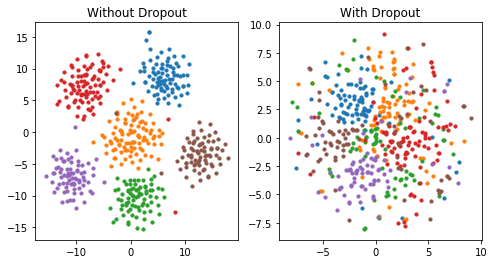

In [4]:
fig = plt.figure(figsize=(8,4))
fig.add_subplot(121)
for i in range(KK):
    plt.scatter(tsne_true[Y==unique_class[i],0],
                tsne_true[Y==unique_class[i],1], 
                s=10,label = unique_class[i] ) 
plt.title('Without Dropout')
    
fig.add_subplot(122)
for i in range(KK):
    plt.scatter(tsne_raw[Y==unique_class[i],0],
                tsne_raw[Y==unique_class[i],1], 
                s=10,label = unique_class[i] )
plt.title('With Dropout')

#### imputation by AutoClass

In [5]:
res = AutoClassImpute(X)
imp = res['imp']

500 cells and 973 genes
n_cluster = 8
n_cluster = 9
n_cluster = 10
escape time is: 59.683085441589355


Text(0, 0.5, 'tSNE2')

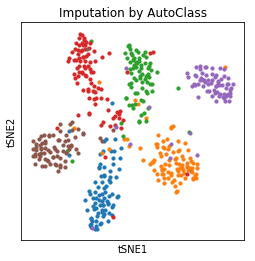

In [6]:
PCA_imp = PCA(n_components=50).fit_transform(imp)
tsne_imp = TSNE(n_components=2).fit_transform(PCA_imp)

fig = plt.figure(figsize=(4,4))
for i in range(KK):
    plt.scatter(tsne_imp[Y==unique_class[i],0],
                tsne_imp[Y==unique_class[i],1], 
                s=10,label = unique_class[i] ) 
plt.title('Imputation by AutoClass')
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')

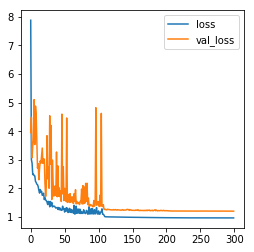

In [7]:
fig = plt.figure(figsize=(4,4))

plt.plot(res['loss_history'][0]['loss'],label='loss')
plt.plot(res['loss_history'][0]['val_loss'],label='val_loss')
plt.legend()

#### imputation by an autoencoder (without classifier branch)

In [8]:
res = AutoClassImpute(X,classifier_weight=0)
imp = res['imp']

500 cells and 973 genes
no classifier layer
escape time is: 17.577112436294556


Text(0, 0.5, 'tSNE2')

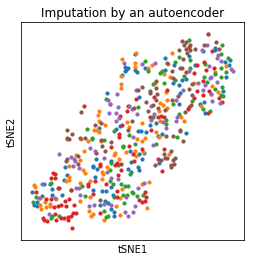

In [9]:
PCA_imp = PCA(n_components=50).fit_transform(imp)
tsne_imp = TSNE(n_components=2).fit_transform(PCA_imp)

fig = plt.figure(figsize=(4,4))
for i in range(KK):
    plt.scatter(tsne_imp[Y==unique_class[i],0],
                tsne_imp[Y==unique_class[i],1], 
                s=10,label = unique_class[i] ) 
plt.title('Imputation by an autoencoder')
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')

#### different number of clusters in the pre-clustering

In [10]:
K = [4,5,6,7,8]
imps = []
for k in K:
    res = AutoClassImpute(X,num_cluster=[k-1,k,k+1]) 
    imps.append(res['imp'])

500 cells and 973 genes
n_cluster = 3
n_cluster = 4
n_cluster = 5
escape time is: 54.47010254859924
500 cells and 973 genes
n_cluster = 4
n_cluster = 5
n_cluster = 6
escape time is: 54.111857414245605
500 cells and 973 genes
n_cluster = 5
n_cluster = 6
n_cluster = 7
escape time is: 53.79364824295044
500 cells and 973 genes
n_cluster = 6
n_cluster = 7
n_cluster = 8
escape time is: 50.87658929824829
500 cells and 973 genes
n_cluster = 7
n_cluster = 8
n_cluster = 9
escape time is: 46.88695240020752


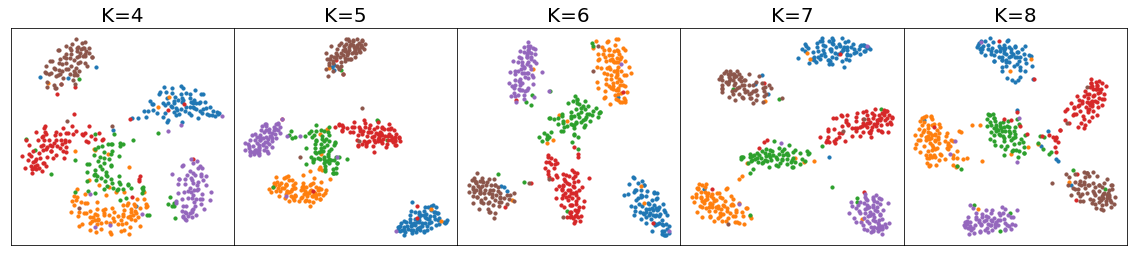

In [11]:
tsnes = []
for i in range(5):
    PCA_autoencoder = PCA(n_components=50).fit_transform(imps[i])
    tsnes.append(TSNE(n_components=2).fit_transform(PCA_autoencoder))
    
fig = plt.figure(figsize=(20,4))
plt.subplots_adjust(wspace=0)
for ii in range(5):
    fig.add_subplot(150+ii+1)

    for i in range(KK):
        plt.scatter(tsnes[ii][Y==unique_class[i],0],
                    tsnes[ii][Y==unique_class[i],1], 
                    s=10,label = unique_class[i] ) 

    plt.xticks([],[])
    plt.yticks([],[])
    plt.title('K={}'.format(K[ii]),fontsize=20)


#### extreme large number of clusters in AutoClass

##### K = 15

500 cells and 973 genes
n_cluster = 14
n_cluster = 15
n_cluster = 16
escape time is: 48.18974041938782


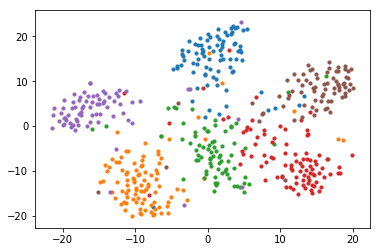

In [12]:
res = AutoClassImpute(X,num_cluster=[14,15,16])
imp = res['imp']
pca = PCA(n_components=50,random_state=1).fit_transform(imp)
tsne_auto = TSNE(n_components=2,random_state=1).fit_transform(pca)
for i in range(KK):
    plt.scatter(tsne_auto[Y==unique_class[i],0],
                tsne_auto[Y==unique_class[i],1], 
                s=10,label = unique_class[i] ) 

##### K = 20

500 cells and 973 genes
n_cluster = 19
n_cluster = 20
n_cluster = 21
escape time is: 31.33988380432129


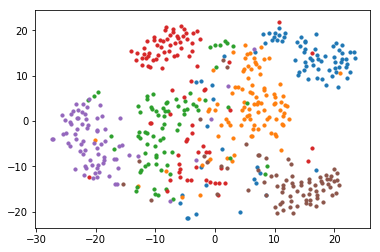

In [13]:
res = AutoClassImpute(X,num_cluster=[19,20,21])
imp = res['imp']
pca = PCA(n_components=50,random_state=1).fit_transform(imp)
tsne_auto = TSNE(n_components=2,random_state=1).fit_transform(pca)
for i in range(KK):
    plt.scatter(tsne_auto[Y==unique_class[i],0],
                tsne_auto[Y==unique_class[i],1], 
                s=10,label = unique_class[i] ) 

#### different bottleneck layer sizes

In [14]:
N = [16,32,64,128,256]
imps = []
for n in N:
    res = AutoClassImpute(X,encoder_layer_size=[n])
    imps.append(res['imp'])

500 cells and 973 genes
n_cluster = 8
n_cluster = 9
n_cluster = 10
escape time is: 37.86224293708801
500 cells and 973 genes
n_cluster = 8
n_cluster = 9
n_cluster = 10
escape time is: 28.102864027023315
500 cells and 973 genes
n_cluster = 8
n_cluster = 9
n_cluster = 10
escape time is: 45.447327852249146
500 cells and 973 genes
n_cluster = 8
n_cluster = 9
n_cluster = 10
escape time is: 58.904025077819824
500 cells and 973 genes
n_cluster = 8
n_cluster = 9
n_cluster = 10
escape time is: 100.91593480110168


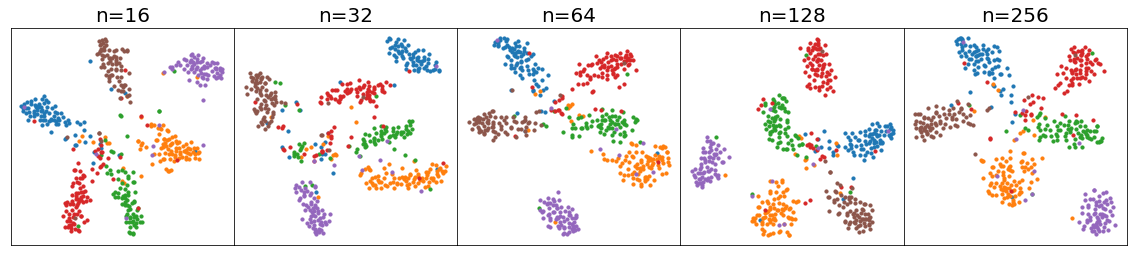

In [15]:
tsnes = []
for i in range(5):
    PCA_autoencoder = PCA(n_components=50).fit_transform(imps[i])
    tsnes.append(TSNE(n_components=2).fit_transform(PCA_autoencoder))
    
fig = plt.figure(figsize=(20,4))
plt.subplots_adjust(wspace=0)
for ii in range(5):
    fig.add_subplot(150+ii+1)

    for i in range(KK):
        plt.scatter(tsnes[ii][Y==unique_class[i],0],
                    tsnes[ii][Y==unique_class[i],1], 
                    s=10,label = unique_class[i] ) 

    plt.xticks([],[])
    plt.yticks([],[])
    plt.title('n={}'.format(N[ii]),fontsize=20)


#### different classifier weights

In [16]:
W = [0.1,0.3,0.5,0.9]
imps = []
for w in W:
    res = AutoClassImpute(X,classifier_weight=w)
    imps.append(res['imp'])

500 cells and 973 genes
n_cluster = 8
n_cluster = 9
n_cluster = 10
escape time is: 64.82851338386536
500 cells and 973 genes
n_cluster = 8
n_cluster = 9
n_cluster = 10
escape time is: 75.30754804611206
500 cells and 973 genes
n_cluster = 8
n_cluster = 9
n_cluster = 10
escape time is: 56.82585859298706
500 cells and 973 genes
n_cluster = 8
n_cluster = 9
n_cluster = 10
escape time is: 53.463884592056274


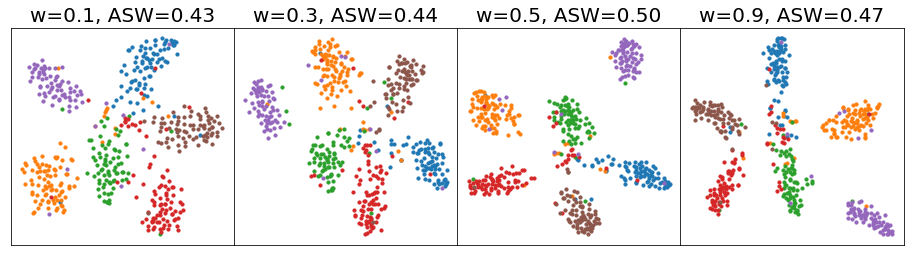

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
tsnes = []
for i in range(4):
    PCA_autoencoder = PCA(n_components=50).fit_transform(imps[i])
    tsnes.append(TSNE(n_components=2).fit_transform(PCA_autoencoder))
ASW = []
for ii in range(4):
    ASW.append(np.round(silhouette_score(StandardScaler().fit_transform(
        tsnes[ii]),Y),3))
fig = plt.figure(figsize=(16,4))
plt.subplots_adjust(wspace=0)
for ii in range(4):
    fig.add_subplot(140+ii+1)

    for i in range(KK):
        plt.scatter(tsnes[ii][Y==unique_class[i],0],
                    tsnes[ii][Y==unique_class[i],1], 
                    s=10,label = unique_class[i] ) 

    plt.xticks([],[])
    plt.yticks([],[])
    plt.title('w={}, ASW={:.2f}'.format(W[ii],ASW[ii]),fontsize=20)
